### 1. Setup

In [24]:
!pip install opencv-python

    100% |████████████████████████████████| 52.4MB 558kB/s eta 0:00:01


In [118]:
# Imports
import numpy as np
import pandas as pd
from glob import glob

# Data Visualizations
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline     

# Utils
from random import choice, sample  # Random choices
from tqdm import tqdm              # Progress bar
import ast

# Torch
import torch
import torchvision.models as models

# Working with torchvision
from PIL import Image
import torchvision.transforms as transforms
from PIL import ImageFile

# ResNet
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image  
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [4]:
# Import images
human_files = np.array(glob("../data/humanImages/*/*"))
dog_files = np.array(glob("../data/dogImages/*/*/*"))

In [5]:
# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


### 2. Exploration - Detect Humans

In [35]:
def viz_face(img_path, faces):
    
    img = cv2.imread(img_path)
    
    # Get bounding box for detected face
    # then add it to the color image
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)

    # Convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot
    plt.imshow(cv_rgb)
    plt.show()

In [36]:
def detect_faces(img_path, face_cascade_model):
    """
    This function finds faces in imgage with
    a pretrained cascade model.
    """
    
    # Load BGR Image
    img = cv2.imread(img_path)
    
    # It is standard procedure to convert BGR images to grayscale.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # The detectMultiScale() function executes the classifier stored in face_cascade 
    # and takes the grayscale image as a parameter, to detect human faces
    faces = face_cascade_model.detectMultiScale(gray)
    
    # faces is a numpy array of detected faces, 
    # where each row corresponds to a detected face
    # Each detected face is a 1D array with four entries 
    # that specifies the bounding box of the detected face
    # The first two entries in the array (extracted in the above code as x and y) 
    # specify the horizontal and vertical positions of the top left corner of the bounding box. 
    # The last two entries in the array (extracted here as w and h) 
    # specify the width and height of the box.
    
    return faces

In [42]:
def is_human(faces):
    return len(faces) > 0

### Impelementation

In this section, I will attempt OpenCV's Haar feature-based cascade classifiers to detect human faces. 

The model can be downloaded [here](https://github.com/opencv/opencv/tree/master/data/haarcascades).

In [8]:
# Use pretrained face detector
face_cascade = cv2.CascadeClassifier('../model/haarcascades/haarcascade_frontalface_alt.xml')

In [9]:
faces = detect_faces(human_files[0], face_cascade)
faces

array([[81, 79, 93, 93]], dtype=int32)

In [10]:
print('Number of faces detected:', len(faces))

Number of faces detected: 1


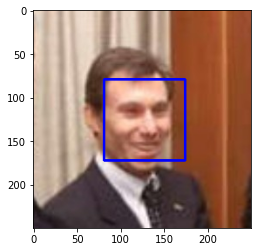

In [12]:
viz_face(human_files[0], faces)

../data/humanImages/Christine_Gregoire/Christine_Gregoire_0003.jpg
Number of faces detected: 1


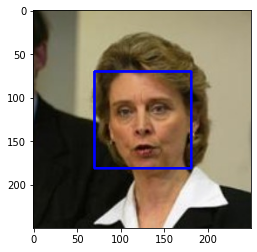

../data/humanImages/Silvio_Berlusconi/Silvio_Berlusconi_0008.jpg
Number of faces detected: 1


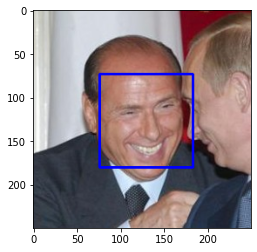

../data/humanImages/George_Robertson/George_Robertson_0021.jpg
Number of faces detected: 1


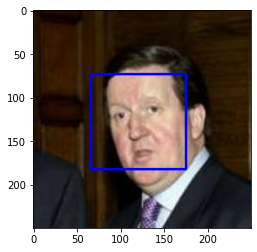

../data/humanImages/Jim_Furyk/Jim_Furyk_0006.jpg
Number of faces detected: 1


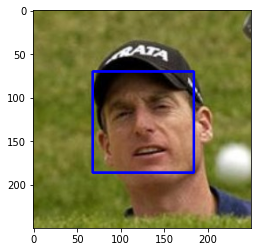

../data/humanImages/Marco_Pantani/Marco_Pantani_0001.jpg
Number of faces detected: 1


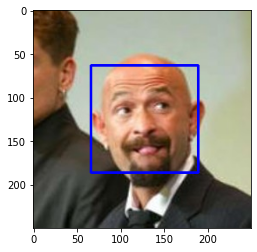

../data/humanImages/Mel_Karmazin/Mel_Karmazin_0001.jpg
Number of faces detected: 1


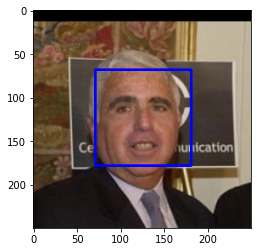

../data/humanImages/Dieter_Zetsche/Dieter_Zetsche_0001.jpg
Number of faces detected: 1


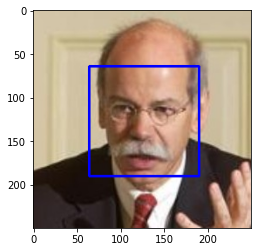

../data/humanImages/Michael_Keaton/Michael_Keaton_0002.jpg
Number of faces detected: 1


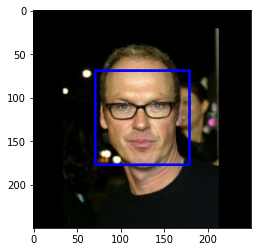

../data/humanImages/John_Abizaid/John_Abizaid_0008.jpg
Number of faces detected: 1


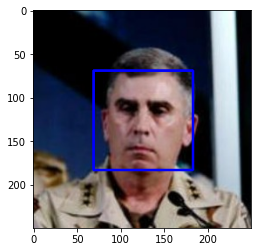

../data/humanImages/Hosni_Mubarak/Hosni_Mubarak_0007.jpg
Number of faces detected: 2


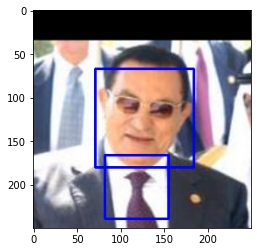

In [13]:
for i in range(0,10):
    
    random_human = choice(human_files)
    print(random_human)
    faces = detect_faces(random_human, face_cascade)
    print('Number of faces detected: {}'.format(len(faces)))
    viz_face(random_human, faces)

**We can quickly check how well this model performs:**

In [22]:
# Sample at random 100 human and dog images

np.random.seed(2021)
random_human_images = np.array(sample(
    list(human_files), 
    100))
random_dog_images = np.array(sample(
    list(dog_files), 
    100))

In [51]:
humans_detected_as_humans = [
    detect_faces(i, face_cascade) for i in tqdm(random_human_images)
]

dogs_detected_as_humans = [
    detect_faces(i, face_cascade) for i in tqdm(random_dog_images)
]

print('Percentage of humans detected as humans is {}%'.format(
    sum(map(is_human, humans_detected_as_humans))*100/len(random_human_images))
     )

print('Percentage of dogs detected as humans is {}%'.format(
    sum(map(is_human, dogs_detected_as_humans))*100/len(random_dog_images))
     )



  0%|          | 0/100 [00:00<?, ?it/s]

  5%|▌         | 5/100 [00:00<00:01, 49.11it/s]

 10%|█         | 10/100 [00:00<00:01, 49.09it/s]

 16%|█▌        | 16/100 [00:00<00:01, 49.76it/s]

 21%|██        | 21/100 [00:00<00:01, 47.60it/s]

 26%|██▌       | 26/100 [00:00<00:01, 48.26it/s]

 32%|███▏      | 32/100 [00:00<00:01, 48.87it/s]

 37%|███▋      | 37/100 [00:00<00:01, 47.66it/s]

 43%|████▎     | 43/100 [00:00<00:01, 48.58it/s]

 48%|████▊     | 48/100 [00:00<00:01, 47.70it/s]

 53%|█████▎    | 53/100 [00:01<00:01, 46.45it/s]

 58%|█████▊    | 58/100 [00:01<00:00, 45.15it/s]

 63%|██████▎   | 63/100 [00:01<00:00, 46.15it/s]

 68%|██████▊   | 68/100 [00:01<00:00, 45.64it/s]

 73%|███████▎  | 73/100 [00:01<00:00, 44.72it/s]

 78%|███████▊  | 78/100 [00:01<00:00, 45.27it/s]

 83%|████████▎ | 83/100 [00:01<00:00, 45.02it/s]

 88%|████████▊ | 88/100 [00:01<00:00, 43.17it/s]

 93%|█████████▎| 93/100 [00:02<00:00, 43.74it/s]

100%|██████████| 100/100 [00:02<00:00, 46.02it/s][A


  0%

Percentage of humans detected as humans is 96.0%
Percentage of dogs detected as humans is 2.0%


**Assessment:** The model detects 96% of humans as humans, which is pretty good, but it also detects 2% of dogs as humans. I would like to know why, that is, which features of the dogs have fooled the models. 

  0%|          | 0/100 [12:48<?, ?it/s]

['../data/dogImages/valid/030.Border_terrier/Border_terrier_02146.jpg'
 '../data/dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07625.jpg']
Number of faces detected: 1


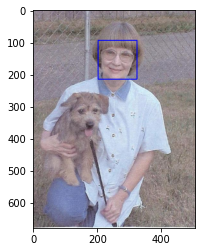

  0%|          | 0/100 [17:00<?, ?it/s]


['../data/dogImages/valid/030.Border_terrier/Border_terrier_02146.jpg'
 '../data/dogImages/test/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07625.jpg']
Number of faces detected: 1


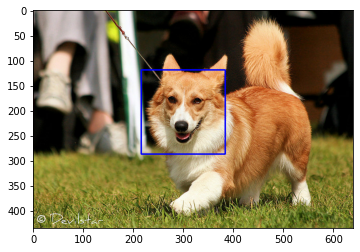

In [56]:
idx_dogs_as_humans = [
    index for index, element in enumerate(dogs_detected_as_humans) if len(element) > 0
]
dogs_as_humans = random_dog_images[idx_dogs_as_humans]


for d in dogs_as_humans:
    
    print(dogs_as_humans)
    dog_faces = detect_faces(d, face_cascade)
    print('Number of faces detected: {}'.format(len(dog_faces)))
    viz_face(d, dog_faces)

**Assessment:** This is interesting because:
1. In the first photo of the border terrier, there **is** a human holding the dog, so the model actually performs correctly in this occasion.
2. So, the only false positive here is the Pembroke Welsh Corgi.

### 3. Exploration - Detect Dogs

**Introduction:** In this section, I will use the VGG-16 model to detect dog breeds. The list of models in torchvision can be found [here](https://pytorch.org/docs/stable/torchvision/models.html).

### Utils Function

In [107]:
def pretrained_predict(img_path, pretrained_model):
    '''
    This function uses a pretrained model to 
    predicted ImageNet class for image at specified path.
    
    Args:
        img_path: path to an image
        pretrained_model: a pretrained model, available here: 
        https://pytorch.org/docs/stable/torchvision/models.html
        
    Returns:
        Index corresponding to the prediction of the pretrained model.
    '''
        
    # Step 1: read the image
    img = Image.open(img_path)
    
    # Step 2: create pipeline
    if pretrained_model == 'VGG16':
        transform_pipeline = transforms.Compose([transforms.RandomResizedCrop(224),
                                                 transforms.ToTensor(),
                                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    # Step 3: apply the pipeline of the loaded image.
    if pretrained_model == 'VGG16':
        tensor = transform_pipeline(img).unsqueeze(0) 
        
    
    # Step 4: Use CUDA, if available
    if torch.cuda.is_available():
        tensor = tensor.cuda()
    
    # Step 5: predict
    if pretrained_model == 'VGG16':
        prediction = VGG16(tensor)
    elif pretrained_model == 'ResNet50':
        prediction = ResNet50(tensor)
    elif pretrained_model == 'InceptionV3':
        prediction = InceptionV3(tensor)
    
    # Step 6: Move tensor to CPU for CPU processing:
    if torch.cuda.is_available():
        prediction = prediction.cpu()
    
    return prediction.data.numpy().argmax()

In [58]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/nguyenh/.cache/torch/hub/checkpoints/vgg16-397923af.pth


**Prediction Class:** While looking at the ImageNet [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from 'Chihuahua' to 'Mexican hairless'. 

Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the dog_detector function below, which returns True if a dog is detected in an image (and False if not).

In [95]:
def detect_dog(idx):
    """
    This function checks whether the ImageNet index
    falls in the range of 151 to 268 (inclusive) for dog prediction.
    
    Args:
        idx: the ImageNet prediction index.
        
    Returns:
        Boolean indicating whether index falls in the dog prediction range.
    """
    return (150 < idx and idx < 269)

In [96]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

humans_detection_idx = [pretrained_predict(i, 'VGG16') for i in tqdm(random_human_images)]
dogs_detection_idx = [pretrained_predict(i, 'VGG16') for i in tqdm(random_dog_images)]

100%|██████████| 100/100 [00:51<00:00,  1.94it/s]


In [76]:
print('Percentage of human files detected as dogs is {}%'.format(
    sum(map(detect_dog, humans_detection_idx))*100/len(detected_humans))
     )
print('Percentage of dogs files detected as dogs is {}%'.format(
    sum(map(detect_dog, dogs_detection_idx))*100/len(detected_dogs))
     )

Percentage of human files detected as dogs is 1.0%
Percentage of dogs files detected as dogs is 94.0%


**Assessment:** This is pretty good. The accuracy of dogs-detected-as-dogs is 94% and the model only misclassifies humans as dogs 1% (or 1 image in our random 100 photos). 

Let's see why the human is misclassified as a dog.

../data/humanImages/Gerhard_Schroeder/Gerhard_Schroeder_0027.jpg


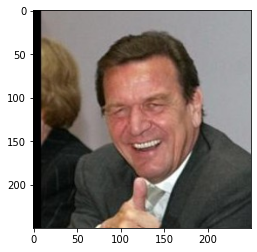

  0%|          | 0/100 [14:53<?, ?it/s]


In [82]:
idx_humans_detected_as_dogs = [index for index, element in enumerate(humans_detection_idx) if detect_dog(element)]
humans_file_detected_as_dogs = random_human_images[idx_humans_detected_as_dogs]

for h in humans_file_detected_as_dogs:
    
    print(h)
    img = cv2.imread(h)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

This is quite unfortunate and I'm not sure why this gentleman's face is classified as a dog. 

Let's switch gear and see which dogs are not indenfied as dogs, as see what they are classified as.

In [85]:
file = open("../inst/imagenet1000_clsidx_to_labels.txt", "r")

contents = file.read()
dictionary = ast.literal_eval(contents)

file.close()

In [88]:
idx_dogs_not_detected_as_dogs = [
    index for index, element in enumerate(dogs_detection_idx) if not detect_dog(element)
]
dogs_file_not_detected_as_dogs = random_dog_images[idx_dogs_not_detected_as_dogs]
dogs_file_not_detected_as_dogs

array(['../data/dogImages/train/024.Bichon_frise/Bichon_frise_01711.jpg',
       '../data/dogImages/train/032.Boston_terrier/Boston_terrier_02245.jpg',
       '../data/dogImages/train/057.Dalmatian/Dalmatian_04019.jpg',
       '../data/dogImages/train/069.French_bulldog/French_bulldog_04821.jpg',
       '../data/dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01955.jpg',
       '../data/dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04443.jpg'],
      dtype='<U99')

../data/dogImages/train/024.Bichon_frise/Bichon_frise_01711.jpg
The prediction is: tiger shark, Galeocerdo cuvieri


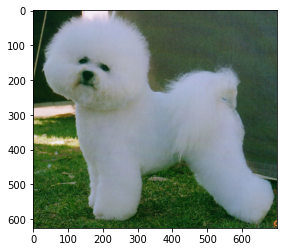

../data/dogImages/train/032.Boston_terrier/Boston_terrier_02245.jpg
The prediction is: kite


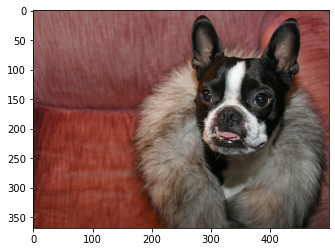

../data/dogImages/train/057.Dalmatian/Dalmatian_04019.jpg
The prediction is: eft


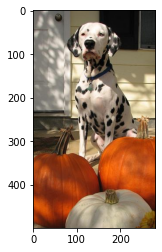

../data/dogImages/train/069.French_bulldog/French_bulldog_04821.jpg
The prediction is: leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea


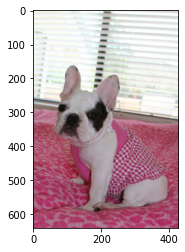

../data/dogImages/train/028.Bluetick_coonhound/Bluetick_coonhound_01955.jpg
The prediction is: scorpion


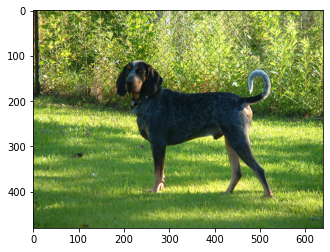

../data/dogImages/train/063.English_springer_spaniel/English_springer_spaniel_04443.jpg
The prediction is: African grey, African gray, Psittacus erithacus


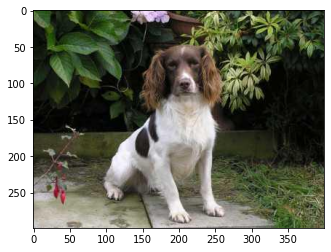

In [93]:
for i, h in enumerate(dogs_file_not_detected_as_dogs):
    
    print(h)
    idx_for_preds = idx_dogs_not_detected_as_dogs[i]
    print('The prediction is: {}'.format(dictionary[idx_for_preds]))
    
    img = cv2.imread(h)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

#### Let's try 2 more pretrained models:

1. ResNet-50
2. Inception v3

### ResNet-50

In [110]:
ResNet50_model = ResNet50(weights='imagenet')

W0101 17:05:26.537807 4544488896 module_wrapper.py:137] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0101 17:05:26.710053 4544488896 module_wrapper.py:137] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



102858752/102853048 [==============================] - 9s 0us/step


When using TensorFlow as backend, Keras CNNs require a **4D array** as input, with shape `(nb_samples, rows, columns, channels)`, where `nb_samples` is to the number of images, and `rows`, `columns`, and `channels` are the number of rows, columns, and channels for each image, respectively.

In [116]:
def get_tensor_from_img_path(img_path):
    """
    This function takes a path to an image
    and converts it to a 4D tensor: (1, rows, columns, channels)
    
    Agrs:
        img_path: string
    
    Returns:
        A 4D tensor that is compatible with Keras CNN
    """
    
    # Step 1: Load the image and resize it to 224x224 pixel
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Step 2: Convert the image to 3D tensor with shape (224, 224, 3) 
    # where 3 is the number of channels
    x = image.img_to_array(img)
    
    # Step 3: convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) 
    # and return 4D tensor
    return np.expand_dims(x, axis=0)

In [117]:
def get_tensors_from_mult_paths(img_paths):
    """
    This function takes multiple paths to images (n paths)
    and convert it to a 4D tensor: (n, rows, columns, channels)
    """
    list_of_tensors = [
        get_tensor_from_img_path(img_path) for img_path in tqdm(img_paths)
    ]
    
    return np.vstack(list_of_tensors)

In [119]:
def ResNet50_predict_labels(img_path):
    """
    This function takes in an image path `img_path`
    preprocess the input:
    (1) First, the RGB image is converted to BGR by reordering the channels.
    (2) Then it applies normalization: the mean pixel (expressed in RGB as  [103.939,116.779,123.68]  
    and calculated from all pixels in all images in ImageNet) must be subtracted from every pixel in each image.
    
    """
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [127]:
human_count = 0    
human_classified_as_dogs = []
for img_path in random_human_images:
    
    preds = ResNet50_predict_labels(img_path)
    is_dog = detect_dog(preds)
    
    if is_dog:
        human_count += 1
        human_classified_as_dogs.append(img_path)
print('Percentage of humans misclassified as dogs: {}%'.format(
    human_count*100/len(random_human_images)
))

Percentage of humans misclassified as dogs: 2.0%


In [126]:
dog_count = 0    
for img_path in random_dog_images:
    
    preds = ResNet50_predict_labels(img_path)
    is_dog = detect_dog(preds)
    
    if is_dog:
        dog_count += 1
print('Percentage of dogs correctly classified as dogs: {}%'.format(
    dog_count*100/len(random_dog_images)
))

Percentage of dogs correctly classified as dogs: 100.0%


**Assessment:** So with ResNet, 100% dogs are classified as dogs, but 2% of humans are misclassified as dogs. Let see them:

In [128]:
human_classified_as_dogs

['../data/humanImages/Tony_Blair/Tony_Blair_0026.jpg',
 '../data/humanImages/Andrew_Fastow/Andrew_Fastow_0001.jpg']

../data/humanImages/Tony_Blair/Tony_Blair_0026.jpg


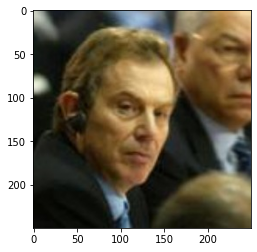

../data/humanImages/Andrew_Fastow/Andrew_Fastow_0001.jpg


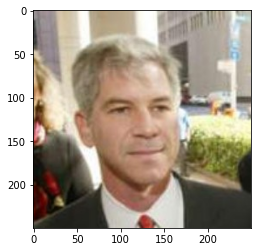

In [129]:
for h in human_classified_as_dogs:
    
    print(h)
    img = cv2.imread(h)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()